In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def cf(data, model_name):

    true_labels = data['labels']
    predicted_labels = data['predictions']

    # Step 3: Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Step 4: Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Step 5: Visualize the normalized confusion matrix
    plt.figure(figsize=(12,8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=sorted(set(true_labels)), yticklabels=sorted(set(true_labels)))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{model_name}')
    plt.savefig(f'./confusion_{model_name}.pdf')
    plt.show()


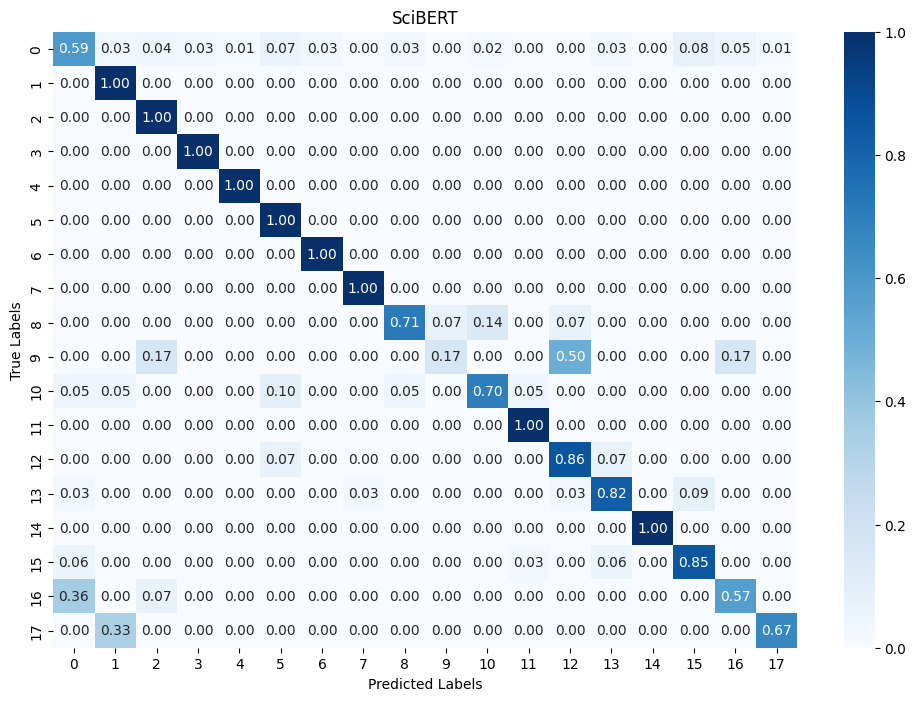

In [7]:
data = pd.read_csv('./../results/scibert_seed_0_combined_OSDG_swisstext_enlarged_OSDG_enlarged_swisstext/scibert__prediction_log__ep5.csv')
model_name = 'SciBERT'

cf(data, model_name)

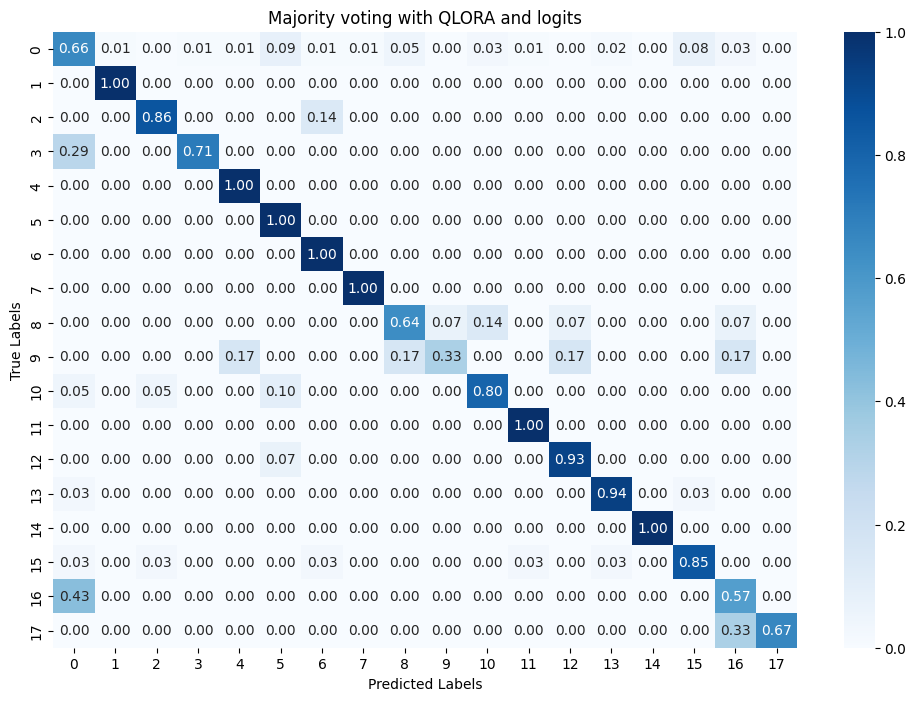

In [8]:
data = pd.read_csv('./../results/ensemble_majority_voting_w_probs/ensemble__prediction_log__ep5.csv')
model_name = 'Majority voting with QLORA and logits'

cf(data, model_name)

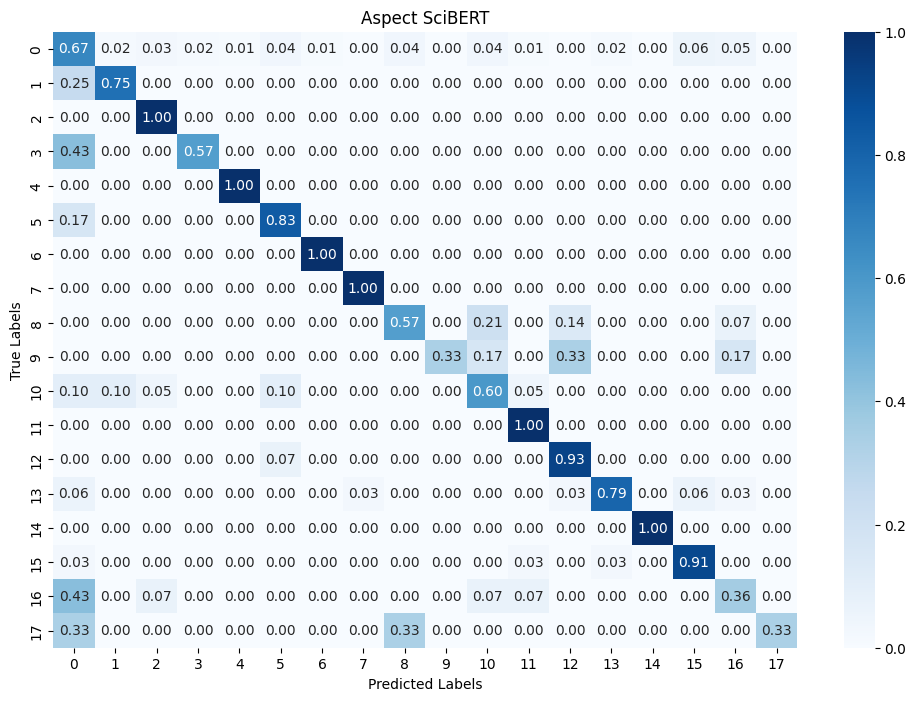

In [9]:
data = pd.read_csv('./../results/aspect_acl_scibert_seed_0_combined_OSDG_swisstext_enlarged_OSDG_enlarged_swisstext/aspect_acl_scibert__prediction_log__ep5.csv')
model_name = 'Aspect SciBERT'

cf(data, model_name)